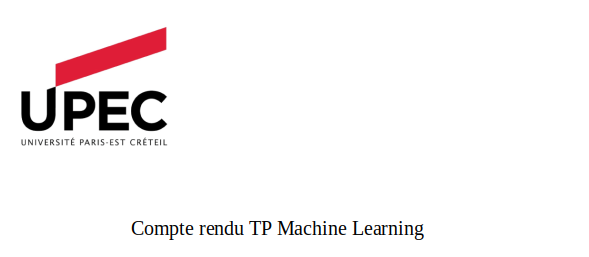

#### KHADIR Nadir
#### AZIRI Abderrahmane

# TP 6 : MLP Titanic

#### Link Github : 

## Introduction :


##### LE MLP :

Un perceptron multicouche est un réseau neuronal reliant plusieurs couches dans un graphe dirigé, ce qui signifie que le chemin de la donnée à travers les nœuds ne va que dans un sens. Chaque nœud, à l'exception des nœuds d'entrée, possède une fonction d'activation non linéaire. Il génère un ensemble de sortie à partir d'un ensemble d'entrée.  Il est par ailleurs, considéré comme une technique d'apprentissage profond.

Le MLP est largement utilisé pour résoudre des problèmes qui nécessitent un apprentissage supervisé, ainsi que pour la recherche en neurosciences computationnelles et en traitement distribué parallèle. Les applications comprennent la reconnaissance vocale, la reconnaissance d'images et la traduction automatique. 

##### TITANIC :

Il s’agit d’un sous-ensemble des passagers du fameux navire Titanic. L’objectif de cet exemple est de construire un modèle qui sait prédire pour un passager particulier s’il a survécu ou pas à ce drame. Ce jeu de données indique pour chaque passager les informations suivantes : 

* PassengerId : identifiant d’un passager.

* Survived : variable binaire indiquant si le passager a survécu au drame ou non.

* Pclass : variable indiquant la classe de la cabine. Elle prend ses valeurs parmi les valeurs 1, 2 et 3 qui correspondent respectivement à la première, seconde et troisième classe.

* Sex : variable indiquant le sexe du passager, Male ou Female.

* Age : variable indiquant l’âge du passager.

* SibSp : variable indiquant si le passager a des frères, des sœurs, un époux ou une épouse à bord du bateau.

* Parch : variable indiquant si le passager a des parents ou des enfants à bord du bateau.

* Fare : prix du ticket.

* Embarked : port d’embarcation (C = Cherbourg, Q = Queenstown, S = Southampton).




###### Preprocessing :
Avant d'appliquer notre model sur le jeu de données TITANIC, il va nous falloir analyser notre dataset. 

In [257]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [461]:
path = r'/home/etudiant/Téléchargements/train.csv'
train = pd.read_csv(path)
path2 = r'/home/etudiant/Téléchargements/test.csv'
test = pd.read_csv(path2)
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [462]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [464]:
train['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

* La colonne PassengerId correspond juste un ordre arbitraire pour numériser les passagers. il est donc inutile de l'inclure dans les données de classification. la même chose est aussi valable pour les noms et prénoms des passagers qui n'influent pas sur leur chance de survie.

* la colonne cabin peut influencer la classification, mais le problème c'est une colonne qui contient beaucoup de cases vides ce qui pourra fausser la classification.
On décide donc de la supprimer.

In [259]:
train_db = train[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']]

In [260]:
train_db.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
Survived      int64
dtype: object

On remplace les données catégoriques dans sex et Embarked on attribuent des valeurs numériques.

In [261]:
train_db['Sex'] = train_db['Sex'].replace('female',0).replace('male',1)
train_db['Embarked']= train_db['Embarked'].replace('S', 0).replace('C', 1).replace('Q', 2)




On supprime les lignes avec des valeurs manqueantes. 

In [280]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

scaler = StandardScaler()


df=train_db.dropna()
df.describe()

y=df['Survived']
X=df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

scaler.fit(X)
X = scaler.transform(X)


#scaler = MinMaxScaler()
#scaler.fit(X)
#X = scaler.transform(X)

##### Analyse des données et standardisation : ACP

Dans cette partie on analyse nos données pour mieux les appréhender, on applique donc une PCA pour mieux identifier les features qui ont des corrélations entre elles, et plus spécialement avec nos labels.

Par ailleurs, après multiples essais nous avons opté pour le StandardScaler() car ça donnait de meilleurs résultats à terme.

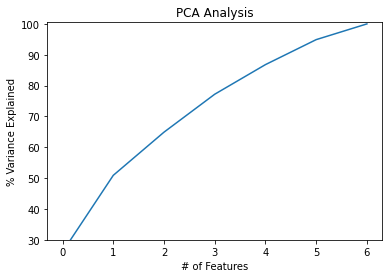

In [290]:
from sklearn.decomposition import PCA
from sklearn import decomposition
import seaborn as sb
import numpy as np
import plotly.express as px
from numpy.linalg import eigh

pca_data = PCA()
pca_data.fit(X)
result = pca_data.transform(X)


variance = pca_data.explained_variance_ratio_ 
var=np.cumsum(np.round(pca_data.explained_variance_ratio_, decimals=3)*100)

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)


plt.plot(var)

cov_matrix = np.cov(X, rowvar=False)



# Determine valeurs et vecteurs propres 
#
egnvalues, egnvectors = eigh(cov_matrix)


# Determine explained variance

total_egnvalues = sum(egnvalues)
var_exp = [(i/total_egnvalues) for i in sorted(egnvalues, reverse=True)]




# Plot la  variance explained et la somme cumulative de explained variance
#
import matplotlib.pyplot as plt
plt.figure()

plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Explained variance individuel')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

On propose une autre approche qui consiste à illustrer une heatmap pour mieux visualiser les corrélations entre les features, ce qui nous intéresse dans ce cas et les intersections entre les features et la colonne survive.
Dans cette carte, ce qui nous intéresse ce sont les valeurs positives ainsi que négatives.

<AxesSubplot:>

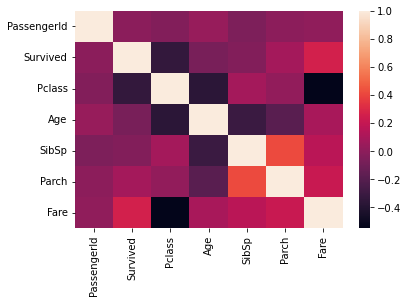

In [291]:
import seaborn as sns
sns.heatmap(train.corr())

<AxesSubplot:>

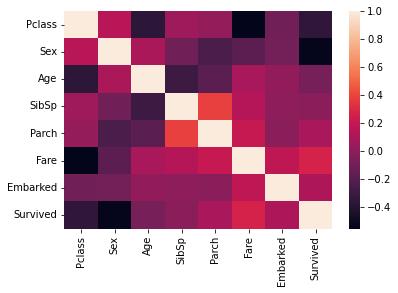

In [293]:
import seaborn as sns
sns.heatmap(df.corr())

Survived corrélé avec fare et parch et pclass (négatif) (on n'est pas intéressé par ce qui est 0).

Survived est aussi corrélé avec sex et pclass qui est lui-même corrélé avec fare (plus grand prix).

In [282]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from keras.datasets import mnist
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

On appliquant notre modèle MLP directement sur notre dataset nettoyé on obtient un score de 80.5%.

In [268]:
mlp=MLPClassifier()
mlp.fit(X_train,y_train)
y_pred=mlp.predict(X_test)
#mlp.score(X_test,y_test)
print(accuracy_score(y_test,y_pred))

0.8055555555555556


##### GRIDSEARCH  cv:
Afin d'améliorer notre résultat on applique un gridsearchcv pour trouver les meilleures paramètres d'entrée de notre  modèle.

In [284]:
warnings.filterwarnings("ignore")

parameter = {
'hidden_layer_sizes': [(50,50,50), (50,100,50),(100,150,150)],
'activation': ['tanh', 'relu'],
'solver': ['sgd', 'adam'],
'alpha': [0.0001,0.1,1,0.01,0.001, 0.05],
'learning_rate_init': [0.5,0.1, 0.01, 0.001],
}


clf = MLPClassifier()
qlf = GridSearchCV(clf, parameter, n_jobs=-1, verbose=11)
qlf.fit(X_train, y_train)

print(qlf.best_params_)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 3/5; 2/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=adam
[CV 3/5; 2/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=adam;, score=0.766 total time=   0.2s
[CV 5/5; 4/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam
[CV 5/5; 4/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam;, score=0.797 total time=   0.4s
[CV 4/5; 6/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam
[CV 4/5; 6/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam;, score=0.781 total time=   1.3s
[CV 1/5; 13/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd
[CV 1/5; 13/288] END activation=tanh, alpha=0.000

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 2/5; 1/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=sgd
[CV 2/5; 1/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=sgd;, score=0.766 total time=   0.8s
[CV 1/5; 7/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd
[CV 1/5; 7/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd;, score=0.766 total time=   0.9s
[CV 2/5; 10/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam
[CV 2/5; 10/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam;, score=0.727 total time=   0.3s
[CV 3/5; 10/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam
[CV 3/5; 10/288] END activation=tanh, alpha=0.0

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 4/5; 2/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=adam
[CV 4/5; 2/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=adam;, score=0.594 total time=   0.2s
[CV 1/5; 5/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd
[CV 1/5; 5/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd;, score=0.789 total time=   1.2s
[CV 1/5; 9/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd
[CV 1/5; 9/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd;, score=0.758 total time=   0.9s
[CV 2/5; 9/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd
[CV 2/5; 9/288] END activation=tanh, alpha=0.0001, hi

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 1/5; 2/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=adam
[CV 1/5; 2/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=adam;, score=0.688 total time=   0.1s
[CV 2/5; 4/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam
[CV 2/5; 4/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam;, score=0.750 total time=   0.4s
[CV 4/5; 5/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd
[CV 4/5; 5/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd;, score=0.812 total time=   1.2s
[CV 3/5; 11/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd
[CV 3/5; 11/288] END activation=tanh, alpha=0.0001, 

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 4/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam
[CV 1/5; 4/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam;, score=0.812 total time=   0.3s
[CV 2/5; 5/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd
[CV 2/5; 5/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd;, score=0.781 total time=   1.2s
[CV 3/5; 9/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd
[CV 3/5; 9/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd;, score=0.789 total time=   0.7s
[CV 4/5; 9/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd
[CV 4/5; 9/288] END activation=tanh, alpha=0.0001, hi

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 2/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=adam
[CV 5/5; 2/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=adam;, score=0.445 total time=   0.2s
[CV 3/5; 4/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam
[CV 3/5; 4/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam;, score=0.789 total time=   0.3s
[CV 3/5; 5/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd
[CV 3/5; 5/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd;, score=0.828 total time=   1.2s
[CV 1/5; 11/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd
[CV 1/5; 11/288] END activation=tanh, alpha=0.0001, 

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 1/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=sgd
[CV 1/5; 1/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=sgd;, score=0.781 total time=   0.6s
[CV 2/5; 6/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam
[CV 2/5; 6/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam;, score=0.742 total time=   1.0s
[CV 5/5; 9/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd
[CV 5/5; 9/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd;, score=0.766 total time=   1.5s
[CV 1/5; 10/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam
[CV 1/5; 10/288] END activation=tanh, alpha=0.0001,

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 5/5; 1/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=sgd
[CV 5/5; 1/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=sgd;, score=0.789 total time=   0.7s
[CV 5/5; 6/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam
[CV 5/5; 6/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam;, score=0.773 total time=   1.2s
[CV 4/5; 12/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam
[CV 4/5; 12/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam;, score=0.789 total time=   0.6s
[CV 5/5; 12/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam
[CV 5/5; 12/288] END activation=tanh, alpha=0.0

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 1/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=sgd
[CV 3/5; 1/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=sgd;, score=0.805 total time=   0.6s
[CV 3/5; 6/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam
[CV 3/5; 6/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam;, score=0.805 total time=   1.1s
[CV 4/5; 10/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam
[CV 4/5; 10/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam;, score=0.727 total time=   0.3s
[CV 5/5; 10/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam
[CV 5/5; 10/288] END activation=tanh, alpha=0.0

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 3/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd
[CV 4/5; 3/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd;, score=0.789 total time=   1.2s
[CV 2/5; 8/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam
[CV 2/5; 8/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam;, score=0.766 total time=   1.4s
[CV 3/5; 8/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam
[CV 3/5; 8/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam;, score=0.797 total time=   1.4s
[CV 2/5; 18/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam
[CV 2/5; 18/288] END activation=tanh, alpha

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 2/5; 3/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd
[CV 2/5; 3/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd;, score=0.773 total time=   1.2s
[CV 3/5; 7/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd
[CV 3/5; 7/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd;, score=0.781 total time=   1.2s
[CV 4/5; 7/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd
[CV 4/5; 7/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd;, score=0.781 total time=   0.7s
[CV 2/5; 16/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam
[CV 2/5; 16/288] END activation=tanh, alpha=0.0

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 4/5; 1/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=sgd
[CV 4/5; 1/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=sgd;, score=0.820 total time=   0.6s
[CV 1/5; 6/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam
[CV 1/5; 6/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam;, score=0.742 total time=   1.2s
[CV 2/5; 12/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam
[CV 2/5; 12/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam;, score=0.773 total time=   0.7s
[CV 3/5; 12/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam
[CV 3/5; 12/288] END activation=tanh, alpha=0.0

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 3/5; 3/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd
[CV 3/5; 3/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd;, score=0.789 total time=   1.3s
[CV 4/5; 8/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam
[CV 4/5; 8/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam;, score=0.797 total time=   1.3s
[CV 5/5; 8/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam
[CV 5/5; 8/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam;, score=0.812 total time=   1.4s
[CV 5/5; 17/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd
[CV 5/5; 17/288] END activation=tanh, alpha=

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 3/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd
[CV 5/5; 3/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd;, score=0.781 total time=   1.2s
[CV 5/5; 7/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd
[CV 5/5; 7/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd;, score=0.805 total time=   0.8s
[CV 1/5; 8/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam
[CV 1/5; 8/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam;, score=0.797 total time=   1.4s
[CV 4/5; 16/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam
[CV 4/5; 16/288] END activation=tanh, alpha=0

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 3/5; 79/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd;, score=0.789 total time=   1.2s
[CV 2/5; 83/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd
[CV 2/5; 83/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd;, score=0.750 total time=   1.8s
[CV 3/5; 87/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd
[CV 3/5; 87/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd;, score=0.781 total time=   2.0s
[CV 1/5; 92/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam
[CV 1/5; 92/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam;, score=0.781 total time=   2.1s
[CV 2/5; 94/288] S

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 1/5; 84/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam;, score=0.773 total time=   0.4s
[CV 2/5; 86/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam
[CV 2/5; 86/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam;, score=0.742 total time=   1.4s
[CV 3/5; 88/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam
[CV 3/5; 88/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam;, score=0.812 total time=   2.0s
[CV 1/5; 93/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd
[CV 1/5; 93/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd;, score=0.789 total time=   5.3s
[CV 3/5; 96/

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 87/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd;, score=0.797 total time=   1.2s
[CV 3/5; 90/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam
[CV 3/5; 90/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam;, score=0.719 total time=   1.3s
[CV 5/5; 92/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam
[CV 5/5; 92/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam;, score=0.797 total time=   2.8s
[CV 1/5; 95/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd
[CV 1/5; 95/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd;, score=0.766 total time=   3.1s
[CV 3/5

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 3/5; 83/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd;, score=0.773 total time=   1.8s
[CV 5/5; 87/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd
[CV 5/5; 87/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd;, score=0.812 total time=   1.3s
[CV 3/5; 91/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd
[CV 3/5; 91/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd;, score=0.750 total time=   5.3s
[CV 4/5; 95/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd
[CV 4/5; 95/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd;, score=0.789 total time=   2.2s
[CV 1/5; 98/2

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 88/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam;, score=0.805 total time=   2.3s
[CV 3/5; 93/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd
[CV 3/5; 93/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd;, score=0.797 total time=   5.4s
[CV 2/5; 97/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=sgd
[CV 2/5; 97/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=sgd;, score=0.773 total time=   0.9s
[CV 3/5; 99/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd
[CV 3/5; 99/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd;, score=0.773 total time=   1.3s
[CV 3/5; 102/288] ST

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 5/5; 90/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam;, score=0.758 total time=   0.3s
[CV 4/5; 91/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd
[CV 4/5; 91/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd;, score=0.789 total time=   5.2s
[CV 3/5; 95/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd
[CV 3/5; 95/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd;, score=0.781 total time=   3.3s
[CV 2/5; 101/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd
[CV 2/5; 101/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd;, score=0.766 total time=   1.3s
[CV 3/5; 1

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 2/5; 85/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd;, score=0.758 total time=   2.1s
[CV 5/5; 89/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd
[CV 5/5; 89/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd;, score=0.797 total time=   3.0s
[CV 1/5; 94/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam
[CV 1/5; 94/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam;, score=0.766 total time=   5.2s
[CV 2/5; 98/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=adam
[CV 2/5; 98/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=adam;, score=0.586 total time=   0.1s
[CV 2/5; 99/28

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 95/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd;, score=0.812 total time=   3.0s
[CV 4/5; 100/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam
[CV 4/5; 100/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam;, score=0.805 total time=   0.3s
[CV 5/5; 101/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd
[CV 5/5; 101/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd;, score=0.812 total time=   1.4s
[CV 1/5; 104/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam
[CV 1/5; 104/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam;, score=0.805 total time=   1.6s
[CV 5/5; 

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 99/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd;, score=0.773 total time=   1.4s
[CV 2/5; 102/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam
[CV 2/5; 102/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam;, score=0.742 total time=   1.5s
[CV 1/5; 105/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd
[CV 1/5; 105/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd;, score=0.781 total time=   0.8s
[CV 3/5; 108/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam
[CV 3/5; 108/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam;, score=0.828 total time=   0.5s
[CV 3/5; 110/

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 92/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam
[CV 2/5; 92/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam;, score=0.727 total time=   2.0s
[CV 3/5; 94/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam
[CV 3/5; 94/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam;, score=0.766 total time=   3.3s
[CV 1/5; 96/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam
[CV 1/5; 96/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam;, score=0.781 total time=   4.6s
[CV 4/5; 105/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd
[CV 4/5; 105/288] END activation=t

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 4/5; 108/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam;, score=0.773 total time=   0.8s
[CV 5/5; 110/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam
[CV 5/5; 110/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam;, score=0.766 total time=   1.9s
[CV 4/5; 114/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam
[CV 4/5; 114/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam;, score=0.797 total time=   0.8s
[CV 1/5; 116/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam
[CV 1/5; 116/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam;, score=0.773 total time=   2.3

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 5/5; 103/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd;, score=0.805 total time=   1.3s
[CV 5/5; 107/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd
[CV 5/5; 107/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd;, score=0.781 total time=   1.7s
[CV 1/5; 112/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam
[CV 1/5; 112/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam;, score=0.758 total time=   2.1s
[CV 2/5; 116/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam
[CV 2/5; 116/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam;, score=0.758 total time=   1.5s
[C

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 1/5; 101/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd;, score=0.789 total time=   1.3s
[CV 2/5; 103/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd
[CV 2/5; 103/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd;, score=0.797 total time=   1.1s
[CV 5/5; 106/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam
[CV 5/5; 106/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam;, score=0.766 total time=   0.4s
[CV 1/5; 108/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam
[CV 1/5; 108/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam;, score=0.750 total time=   0.6s
[CV 2/5; 

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 1/5; 110/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam;, score=0.742 total time=   1.9s
[CV 1/5; 114/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam
[CV 1/5; 114/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam;, score=0.750 total time=   0.7s
[CV 3/5; 115/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd
[CV 3/5; 115/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd;, score=0.789 total time=   4.3s
[CV 3/5; 119/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd
[CV 3/5; 119/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd;, score=0.781 total time=   

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 4/5; 111/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd;, score=0.781 total time=   1.2s
[CV 5/5; 114/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam
[CV 5/5; 114/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam;, score=0.805 total time=   0.5s
[CV 5/5; 115/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd
[CV 5/5; 115/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd;, score=0.797 total time=   5.2s
[CV 5/5; 119/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd
[CV 5/5; 119/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd;, score=0.789 total time=   

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 1/5; 109/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd;, score=0.766 total time=   1.7s
[CV 3/5; 112/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam
[CV 3/5; 112/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam;, score=0.812 total time=   2.1s
[CV 3/5; 116/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam
[CV 3/5; 116/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam;, score=0.820 total time=   1.4s
[CV 4/5; 118/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam
[CV 4/5; 118/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam;, score=0.812 total time=  

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 5/5; 157/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd;, score=0.828 total time=   1.3s
[CV 5/5; 161/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd
[CV 5/5; 161/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd;, score=0.750 total time=   2.4s
[CV 5/5; 165/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd
[CV 5/5; 165/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd;, score=0.828 total time=   4.9s
[CV 5/5; 171/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd
[CV 5/5; 171/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd;, score=0.789 total time=   0.6s
[CV 5

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 4/5; 174/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam;, score=0.820 total time=   0.5s
[CV 1/5; 176/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam
[CV 1/5; 176/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam;, score=0.773 total time=   1.0s
[CV 4/5; 180/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam
[CV 4/5; 180/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam;, score=0.836 total time=   0.4s
[CV 2/5; 182/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam
[CV 2/5; 182/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam;, score=0.781 total time=   0.5s
[CV 2/5; 184/288] 

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 3/5; 161/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd;, score=0.805 total time=   1.3s
[CV 3/5; 164/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam
[CV 3/5; 164/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam;, score=0.805 total time=   1.9s
[CV 3/5; 167/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd
[CV 3/5; 167/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd;, score=0.805 total time=   4.6s
[CV 2/5; 172/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam
[CV 2/5; 172/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam;, score=0.766 total time=   0.4

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 1/5; 167/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd;, score=0.781 total time=   4.8s
[CV 1/5; 172/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam
[CV 1/5; 172/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam;, score=0.812 total time=   0.3s
[CV 1/5; 173/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd
[CV 1/5; 173/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd;, score=0.805 total time=   1.0s
[CV 5/5; 176/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam
[CV 5/5; 176/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam;, score=0.789 total time=   1.1s
[CV 1/5; 182/288] 

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 5/5; 179/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd;, score=0.836 total time=   0.9s
[CV 5/5; 183/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd
[CV 5/5; 183/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd;, score=0.805 total time=   1.4s
[CV 3/5; 187/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd
[CV 3/5; 187/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd;, score=0.828 total time=   2.6s
[CV 4/5; 191/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd
[CV 4/5; 191/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd;, score=0.797 total time=   4.4s
[CV 5/5; 198/

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 2/5; 186/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam;, score=0.438 total time=   0.2s
[CV 4/5; 187/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd
[CV 4/5; 187/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd;, score=0.828 total time=   2.6s
[CV 3/5; 191/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd
[CV 3/5; 191/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd;, score=0.805 total time=   4.4s
[CV 4/5; 198/288] START activation=relu, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam
[CV 4/5; 198/288] END activation=relu, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam;, score=0.781 total time=   0.5s
[CV 2/5; 200/288

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 3/5; 188/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam;, score=0.781 total time=   0.4s
[CV 5/5; 189/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd
[CV 5/5; 189/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd;, score=0.812 total time=   5.0s
[CV 5/5; 195/288] START activation=relu, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd
[CV 5/5; 195/288] END activation=relu, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd;, score=0.766 total time=   0.8s
[CV 1/5; 197/288] START activation=relu, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd
[CV 1/5; 197/288] END activation=relu, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd;, score=0.805 total time=   1.0s
[CV 3/5; 200/288] START activa

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 195/288] START activation=relu, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd
[CV 3/5; 195/288] END activation=relu, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd;, score=0.836 total time=   0.7s
[CV 5/5; 196/288] START activation=relu, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam
[CV 5/5; 196/288] END activation=relu, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam;, score=0.836 total time=   0.2s
[CV 3/5; 197/288] START activation=relu, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd
[CV 3/5; 197/288] END activation=relu, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd;, score=0.797 total time=   1.0s
[CV 4/5; 200/288] START activation=relu, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam
[CV 4/5; 200/288] END activation=relu, alpha=1, hidden_layer_sizes=(50, 50

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 2/5; 188/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam;, score=0.781 total time=   2.2s
[CV 5/5; 190/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam
[CV 5/5; 190/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam;, score=0.766 total time=   1.4s
[CV 4/5; 192/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam
[CV 4/5; 192/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam;, score=0.797 total time=   4.5s
[CV 2/5; 204/288] START activation=relu, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam
[CV 2/5; 204/288] END activation=relu, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam;, score=0.773 total time=   0.4s
[CV 1/5; 2

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'relu', 'alpha': 1, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate_init': 0.5, 'solver': 'sgd'}


In [285]:
y_pred = qlf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8333333333333334

On obtient un score de 83%, soit une amélioration net de 3% par rapport à notre précèdente.  

##### Base de donnée biaisée :

Après l'analyse de notre database on avait remarqué que celle-ci était très déséquilibrée et bisaisée, en d'autres termes le modèle donne plus d'importance à la classification de la classe avec plus d'éléments.

Ce biais peut influencer de nombreux algorithmes d'apprentissage automatique, conduisant certains à ignorer complètement la classe minoritaire. C'est un problème car c'est généralement sur la classe minoritaire que les prédictions sont les plus importantes.

Une approche pour résoudre le problème du déséquilibre des classes consiste à rééchantillonner de manière aléatoire l'ensemble de données d'apprentissage. Les deux principales approches de rééchantillonnage aléatoire d'un ensemble de données déséquilibré consistent à supprimer des exemples de la classe majoritaire, ce que l'on appelle le sous-échantillonnage, ou à dupliquer des exemples de la classe minoritaire, ce que l'on appelle le sur-échantillonnage.



* Oversampling :

<AxesSubplot:>

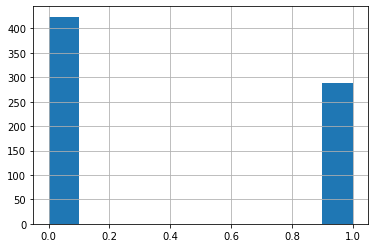

In [308]:
df['Survived'].hist()

Avant l'oversampling.

In [318]:
class_2,class_1 = df.Survived.value_counts()
c2 = df[df['Survived'] == 0]
c1 = df[df['Survived'] == 1]
df_1 = c1.sample(max(class_1,class_2),replace=True)
df_2 = c2.sample(max(class_1,class_2),replace=True)
oversampled_df = pd.concat([df_1,df_2], axis=0)

<AxesSubplot:>

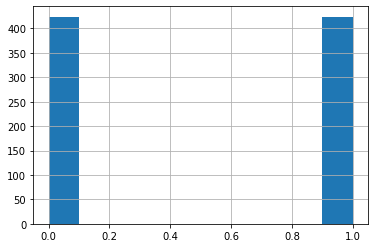

In [319]:
oversampled_df['Survived'].hist()

Aprés l'oversampling 

In [320]:
scaler = StandardScaler()

y=oversampled_df['Survived']
X=oversampled_df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

warnings.filterwarnings("ignore")

parameter = {
'hidden_layer_sizes': [(50,50,50), (50,100,50),(100,150,150)],
'activation': ['tanh', 'relu'],
'solver': ['sgd', 'adam'],
'alpha': [0.0001,0.1,1,0.01,0.001, 0.05],
'learning_rate_init': [0.5,0.1, 0.01, 0.001],
}


clf = MLPClassifier()
qlf = GridSearchCV(clf, parameter, n_jobs=-1, verbose=11)
qlf.fit(X_train, y_train)

print(qlf.best_params_)

y_pred = qlf.predict(X_test)
print(accuracy_score(y_test,y_pred))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 1/5; 188/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam
[CV 1/5; 188/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam;, score=0.783 total time=   0.3s
[CV 5/5; 189/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd
[CV 5/5; 189/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd;, score=0.772 total time=   3.5s
[CV 4/5; 195/288] START activation=relu, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd
[CV 4/5; 195/288] END activation=relu, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd;, score=0.815 total time=   0.6s
[CV 3/5; 197/288] START activation=relu, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd
[CV 3/5; 197/288] END activation=relu, alpha=1, hidden_l

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 1/5; 212/288] END activation=relu, alpha=1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam;, score=0.728 total time=   0.2s
[CV 1/5; 213/288] START activation=relu, alpha=1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd
[CV 1/5; 213/288] END activation=relu, alpha=1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd;, score=0.783 total time=   3.6s
[CV 4/5; 217/288] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=sgd
[CV 4/5; 217/288] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=sgd;, score=0.750 total time=   0.2s
[CV 3/5; 219/288] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd
[CV 3/5; 219/288] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd;, score=0.750 total time=   0.3s
[CV 5/5; 220/288] START ac

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 3/5; 231/288] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd;, score=0.783 total time=   1.0s
[CV 3/5; 234/288] START activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam
[CV 3/5; 234/288] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam;, score=0.652 total time=   0.2s
[CV 2/5; 235/288] START activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd
[CV 2/5; 235/288] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd;, score=0.848 total time=   1.9s
[CV 5/5; 238/288] START activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam
[CV 5/5; 238/288] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam;, score=0.696 total time=   1.4s
[C

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 2/5; 234/288] START activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam
[CV 2/5; 234/288] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam;, score=0.511 total time=   0.2s
[CV 4/5; 234/288] START activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam
[CV 4/5; 234/288] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam;, score=0.685 total time=   0.4s
[CV 4/5; 236/288] START activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam
[CV 4/5; 236/288] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam;, score=0.728 total time=   1.7s
[CV 2/5; 239/288] START activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd
[CV 2/5; 239/288] END activatio

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 2/5; 216/288] END activation=relu, alpha=1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam;, score=0.826 total time=   3.0s
[CV 5/5; 224/288] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam
[CV 5/5; 224/288] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam;, score=0.717 total time=   0.8s
[CV 5/5; 230/288] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam
[CV 5/5; 230/288] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam;, score=0.707 total time=   0.5s
[CV 1/5; 233/288] START activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd
[CV 1/5; 233/288] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd;, score=0.750 total time=   1.6s
[CV 2/5;

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 2/5; 254/288] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam
[CV 2/5; 254/288] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam;, score=0.848 total time=   0.4s
[CV 3/5; 256/288] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam
[CV 3/5; 256/288] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam;, score=0.793 total time=   1.2s
[CV 1/5; 261/288] START activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd
[CV 1/5; 261/288] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd;, score=0.815 total time=   3.3s
[CV 3/5; 265/288] START activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=sgd
[CV 3/5; 265/288] END activation

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 3/5; 253/288] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd;, score=0.783 total time=   0.9s
[CV 4/5; 257/288] START activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd
[CV 4/5; 257/288] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd;, score=0.804 total time=   1.1s
[CV 3/5; 261/288] START activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd
[CV 3/5; 261/288] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd;, score=0.793 total time=   3.5s
[CV 5/5; 265/288] START activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=sgd
[CV 5/5; 265/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=sgd;, score=0.707 total time=   0.4s
[CV 1/5;

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 4/5; 250/288] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam;, score=0.761 total time=   1.0s
[CV 5/5; 256/288] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam
[CV 5/5; 256/288] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam;, score=0.707 total time=   1.4s
[CV 4/5; 261/288] START activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd
[CV 4/5; 261/288] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd;, score=0.815 total time=   3.7s
[CV 5/5; 267/288] START activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd
[CV 5/5; 267/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd;, score=0.707 total time=   0.6s
[CV 2/

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 4/5; 269/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd;, score=0.815 total time=   0.8s
[CV 3/5; 272/288] START activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam
[CV 3/5; 272/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam;, score=0.783 total time=   0.7s
[CV 1/5; 277/288] START activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd
[CV 1/5; 277/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd;, score=0.772 total time=   0.9s
[CV 2/5; 281/288] START activation=relu, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd
[CV 2/5; 281/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd;, score=0.837 total time=   0.8s
[CV 1/5; 285

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 275/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd;, score=0.793 total time=   0.7s
[CV 2/5; 280/288] START activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam
[CV 2/5; 280/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam;, score=0.761 total time=   1.3s
[CV 2/5; 286/288] START activation=relu, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam
[CV 2/5; 286/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam;, score=0.837 total time=   2.2s
[CV 4/5; 288/288] START activation=relu, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam
[CV 4/5; 288/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam;, score=0.783 total time=   2.2

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 4/5; 258/288] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam;, score=0.533 total time=   0.3s
[CV 4/5; 259/288] START activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd
[CV 4/5; 259/288] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd;, score=0.761 total time=   2.2s
[CV 4/5; 263/288] START activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd
[CV 4/5; 263/288] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd;, score=0.750 total time=   3.2s
[CV 1/5; 271/288] START activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd
[CV 1/5; 271/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd;, score=0.783 total time=   0.8s


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 1/5; 287/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd;, score=0.772 total time=   2.9s
[CV 2/5; 2/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=adam
[CV 2/5; 2/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=adam;, score=0.713 total time=   0.2s
[CV 3/5; 4/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam
[CV 3/5; 4/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam;, score=0.875 total time=   0.3s
[CV 3/5; 5/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd
[CV 3/5; 5/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd;, score=0.824 total time=   1.3s
[CV 1/5; 9/288] ST

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 5/5; 278/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam;, score=0.663 total time=   0.4s
[CV 4/5; 280/288] START activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam
[CV 4/5; 280/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam;, score=0.826 total time=   1.4s
[CV 4/5; 286/288] START activation=relu, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam
[CV 4/5; 286/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam;, score=0.750 total time=   1.9s
[CV 3/5; 288/288] START activation=relu, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam
[CV 3/5; 288/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam;, score=0.783 total time=   2

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 12/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam;, score=0.860 total time=   0.4s
[CV 4/5; 13/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd
[CV 4/5; 13/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd;, score=0.867 total time=   2.2s
[CV 2/5; 18/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam
[CV 2/5; 18/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam;, score=0.662 total time=   0.9s
[CV 3/5; 19/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd
[CV 3/5; 19/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd;, score=0.831 total time=   6.5s
[C

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 5/5; 6/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam;, score=0.852 total time=   1.1s
[CV 4/5; 9/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd
[CV 4/5; 9/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd;, score=0.822 total time=   0.6s
[CV 2/5; 11/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd
[CV 2/5; 11/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd;, score=0.868 total time=   2.0s
[CV 3/5; 16/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam
[CV 3/5; 16/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam;, score=0.846 total time=   2.2s
[CV 1/5; 21

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 4/5; 5/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd;, score=0.881 total time=   1.3s
[CV 3/5; 9/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd
[CV 3/5; 9/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd;, score=0.831 total time=   0.9s
[CV 5/5; 12/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam
[CV 5/5; 12/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam;, score=0.785 total time=   0.4s
[CV 3/5; 14/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam
[CV 3/5; 14/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam;, score=0.846 total time=   1.1s
[CV 2/5; 15/

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt


[CV 2/5; 33/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd;, score=0.846 total time=   0.8s
[CV 2/5; 36/288] START activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam
[CV 2/5; 36/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam;, score=0.779 total time=   0.5s
[CV 3/5; 38/288] START activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam
[CV 3/5; 38/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam;, score=0.860 total time=   1.6s
[CV 5/5; 41/288] START activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd
[CV 5/5; 41/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd;, score=0.852 total time=   1.9s
[CV 2/5; 45/288] START ac

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 2/5; 44/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam;, score=0.787 total time=   1.8s
[CV 4/5; 46/288] START activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam
[CV 4/5; 46/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam;, score=0.859 total time=   3.1s
[CV 4/5; 48/288] START activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam
[CV 4/5; 48/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam;, score=0.837 total time=   4.9s
[CV 2/5; 60/288] START activation=tanh, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam
[CV 2/5; 60/288] END activation=tanh, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam;, score=0.794 total time=   0.5s
[CV 3/5; 62/288] 

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 26/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=adam;, score=0.713 total time=   0.1s
[CV 3/5; 26/288] START activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=adam
[CV 3/5; 26/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=adam;, score=0.632 total time=   0.1s
[CV 2/5; 27/288] START activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd
[CV 2/5; 27/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd;, score=0.831 total time=   1.4s
[CV 1/5; 31/288] START activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd
[CV 1/5; 31/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd;, score=0.735 total time=   1.4s
[CV 3/5; 33/288] START activation=ta

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 3/5; 55/288] START activation=tanh, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd
[CV 3/5; 55/288] END activation=tanh, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd;, score=0.809 total time=   1.3s
[CV 5/5; 57/288] START activation=tanh, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd
[CV 5/5; 57/288] END activation=tanh, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd;, score=0.837 total time=   0.5s
[CV 1/5; 61/288] START activation=tanh, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd
[CV 1/5; 61/288] END activation=tanh, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd;, score=0.735 total time=   1.8s
[CV 3/5; 65/288] START activation=tanh, alpha=1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd
[CV 3/5; 65/288] END activation=tanh, alpha=1, hidden_layer_sizes=(100, 150

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 5/5; 75/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd
[CV 5/5; 75/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd;, score=0.837 total time=   1.4s
[CV 3/5; 77/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd
[CV 3/5; 77/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd;, score=0.838 total time=   1.4s
[CV 3/5; 80/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam
[CV 3/5; 80/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam;, score=0.846 total time=   1.4s
[CV 4/5; 85/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd
[CV 4/5; 85/288] END activation=tanh, alpha=0.01, hidden_

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 5/5; 70/288] START activation=tanh, alpha=1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam
[CV 5/5; 70/288] END activation=tanh, alpha=1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam;, score=0.793 total time=   2.2s
[CV 2/5; 72/288] START activation=tanh, alpha=1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam
[CV 2/5; 72/288] END activation=tanh, alpha=1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam;, score=0.809 total time=   5.2s
[CV 1/5; 81/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd
[CV 1/5; 81/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd;, score=0.809 total time=   0.9s
[CV 5/5; 83/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd
[CV 5/5; 83/288] END activation=tanh, alpha=0.01, hidd

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 79/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd
[CV 3/5; 79/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd;, score=0.816 total time=   0.9s
[CV 3/5; 82/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam
[CV 3/5; 82/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam;, score=0.831 total time=   0.8s
[CV 1/5; 86/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam
[CV 1/5; 86/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam;, score=0.853 total time=   1.4s
[CV 1/5; 88/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam
[CV 1/5; 88/288] END activation=tanh, alpha=0.01,

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 76/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam
[CV 4/5; 76/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam;, score=0.874 total time=   0.3s
[CV 5/5; 77/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd
[CV 5/5; 77/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd;, score=0.800 total time=   1.4s
[CV 2/5; 81/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd
[CV 2/5; 81/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd;, score=0.816 total time=   0.6s
[CV 4/5; 82/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam
[CV 4/5; 82/288] END activation=tanh, alpha=0.01, hidden_la

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 4/5; 95/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd
[CV 4/5; 95/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd;, score=0.852 total time=   2.8s
[CV 4/5; 100/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam
[CV 4/5; 100/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam;, score=0.867 total time=   0.3s
[CV 4/5; 101/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd
[CV 4/5; 101/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd;, score=0.859 total time=   1.4s
[CV 5/5; 103/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd
[CV 5/5; 103/288] END activation=tanh, al

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 3/5; 88/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam
[CV 3/5; 88/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam;, score=0.860 total time=   2.3s
[CV 1/5; 93/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd
[CV 1/5; 93/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd;, score=0.743 total time=   5.7s
[CV 4/5; 97/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=sgd
[CV 4/5; 97/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=sgd;, score=0.859 total time=   0.7s
[CV 3/5; 98/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=adam
[CV 3/5; 98/288] END activation=tanh, alpha=0.0

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 96/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam
[CV 4/5; 96/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam;, score=0.881 total time=   4.7s
[CV 1/5; 106/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam
[CV 1/5; 106/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam;, score=0.632 total time=   0.1s
[CV 2/5; 106/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam
[CV 2/5; 106/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam;, score=0.721 total time=   0.4s
[CV 4/5; 107/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd
[CV 4/5; 107/288] END activation=tan

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 76/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam
[CV 1/5; 76/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam;, score=0.809 total time=   0.6s
[CV 3/5; 76/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam
[CV 3/5; 76/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam;, score=0.824 total time=   0.4s
[CV 1/5; 78/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam
[CV 1/5; 78/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam;, score=0.809 total time=   0.8s
[CV 1/5; 79/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd
[CV 1/5; 79/288] END activation=tanh, alpha=0.01, hidden_

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 3/5; 123/288] START activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd
[CV 3/5; 123/288] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd;, score=0.846 total time=   1.5s
[CV 4/5; 126/288] START activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam
[CV 4/5; 126/288] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam;, score=0.874 total time=   1.1s
[CV 1/5; 129/288] START activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd
[CV 1/5; 129/288] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd;, score=0.816 total time=   0.8s
[CV 4/5; 130/288] START activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam
[CV 4/5; 130/288] END activation=tanh, alpha=0.05, h

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 5/5; 113/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd;, score=0.844 total time=   2.4s
[CV 2/5; 118/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam
[CV 2/5; 118/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam;, score=0.860 total time=   3.8s
[CV 4/5; 119/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd
[CV 4/5; 119/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd;, score=0.852 total time=   3.3s
[CV 1/5; 127/288] START activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd
[CV 1/5; 127/288] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd;, score=0.728 total time=   1.

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 1/5; 145/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=sgd;, score=0.831 total time=   0.4s
[CV 2/5; 146/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=adam
[CV 2/5; 146/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=adam;, score=0.507 total time=   0.1s
[CV 1/5; 147/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd
[CV 1/5; 147/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd;, score=0.838 total time=   0.8s
[CV 5/5; 149/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd
[CV 5/5; 149/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd;, score=0.822 total time=   0.9s
[CV 4/5; 15

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 112/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam
[CV 3/5; 112/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam;, score=0.838 total time=   2.2s
[CV 3/5; 117/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd
[CV 3/5; 117/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd;, score=0.824 total time=   5.3s
[CV 4/5; 121/288] START activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=sgd
[CV 4/5; 121/288] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=sgd;, score=0.763 total time=   0.9s
[CV 2/5; 124/288] START activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam
[CV 2/5; 124/288] END activation=tanh, 

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 4/5; 129/288] START activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd
[CV 4/5; 129/288] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd;, score=0.889 total time=   0.5s
[CV 5/5; 131/288] START activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd
[CV 5/5; 131/288] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd;, score=0.830 total time=   1.8s
[CV 3/5; 136/288] START activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam
[CV 3/5; 136/288] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam;, score=0.846 total time=   2.1s
[CV 4/5; 140/288] START activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam
[CV 4/5; 140/288] END activation=tanh, alpha

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 2/5; 149/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd
[CV 2/5; 149/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd;, score=0.801 total time=   1.0s
[CV 1/5; 152/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam
[CV 1/5; 152/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam;, score=0.801 total time=   1.1s
[CV 4/5; 154/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam
[CV 4/5; 154/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam;, score=0.644 total time=   0.1s
[CV 5/5; 155/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd
[CV 5/5; 155/288] END activation=

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 2/5; 161/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd
[CV 2/5; 161/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd;, score=0.838 total time=   1.4s
[CV 1/5; 165/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd
[CV 1/5; 165/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd;, score=0.809 total time=   5.0s
[CV 5/5; 169/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=sgd
[CV 5/5; 169/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=sgd;, score=0.867 total time=   0.4s
[CV 1/5; 171/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd
[CV 1/5; 171/288] END activation=relu, al

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 2/5; 147/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd
[CV 2/5; 147/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd;, score=0.831 total time=   0.6s
[CV 3/5; 149/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd
[CV 3/5; 149/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd;, score=0.846 total time=   1.0s
[CV 2/5; 152/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam
[CV 2/5; 152/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam;, score=0.853 total time=   1.1s
[CV 2/5; 155/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd
[CV 2/5; 155/288] END activation=relu

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 4/5; 168/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam
[CV 4/5; 168/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam;, score=0.904 total time=   4.4s
[CV 1/5; 178/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam
[CV 1/5; 178/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam;, score=0.787 total time=   1.3s
[CV 4/5; 183/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd
[CV 4/5; 183/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd;, score=0.844 total time=   1.6s
[CV 1/5; 188/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam
[CV 1/5; 188/288] END activation=re

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 164/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam
[CV 1/5; 164/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam;, score=0.757 total time=   1.0s
[CV 2/5; 166/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam
[CV 2/5; 166/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam;, score=0.853 total time=   2.0s
[CV 1/5; 168/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam
[CV 1/5; 168/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam;, score=0.875 total time=   4.0s
[CV 1/5; 175/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd
[CV 1/5; 175/288]

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 5/5; 187/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd
[CV 5/5; 187/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd;, score=0.844 total time=   2.8s
[CV 5/5; 191/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd
[CV 5/5; 191/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd;, score=0.770 total time=   4.6s
[CV 1/5; 201/288] START activation=relu, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd
[CV 1/5; 201/288] END activation=relu, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd;, score=0.772 total time=   0.2s
[CV 1/5; 202/288] START activation=relu, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam
[CV 1/5; 202/288] END activation=relu, alpha=1, hidde

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 183/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd
[CV 1/5; 183/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd;, score=0.750 total time=   1.4s
[CV 2/5; 186/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam
[CV 2/5; 186/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam;, score=0.515 total time=   0.3s
[CV 2/5; 187/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd
[CV 2/5; 187/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd;, score=0.831 total time=   2.1s
[CV 1/5; 191/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd
[CV 1/5; 191/288] END activation=relu, alp

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 3/5; 184/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam;, score=0.838 total time=   1.6s
[CV 5/5; 188/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam
[CV 5/5; 188/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam;, score=0.837 total time=   0.4s
[CV 2/5; 190/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam
[CV 2/5; 190/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam;, score=0.860 total time=   3.3s
[CV 1/5; 193/288] START activation=relu, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=sgd
[CV 1/5; 193/288] END activation=relu, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=sgd;, score=0.765 total time=   0.4s
[CV 2/5; 193/288] 

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 1/5; 195/288] END activation=relu, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd;, score=0.787 total time=   0.7s
[CV 4/5; 196/288] START activation=relu, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam
[CV 4/5; 196/288] END activation=relu, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam;, score=0.874 total time=   0.3s
[CV 5/5; 197/288] START activation=relu, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd
[CV 5/5; 197/288] END activation=relu, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd;, score=0.815 total time=   1.1s
[CV 5/5; 201/288] START activation=relu, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd
[CV 5/5; 201/288] END activation=relu, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd;, score=0.807 total time=   0.4s
[CV 1/5; 203/288] START activation=relu, alp

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 2/5; 200/288] START activation=relu, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam
[CV 2/5; 200/288] END activation=relu, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam;, score=0.824 total time=   1.0s
[CV 2/5; 205/288] START activation=relu, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd
[CV 2/5; 205/288] END activation=relu, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd;, score=0.794 total time=   1.3s
[CV 2/5; 209/288] START activation=relu, alpha=1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd
[CV 2/5; 209/288] END activation=relu, alpha=1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd;, score=0.794 total time=   1.2s
[CV 5/5; 213/288] START activation=relu, alpha=1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd
[CV 5/5; 213/288] END activation=relu, alpha=1, hidden_layer_

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 150, 150), 'learning_rate_init': 0.001, 'solver': 'adam'}
0.8411764705882353


### Le score obtenu grace à cette approche est de 84.11%.

# undersample 

In [316]:
class_2,class_1 = df.Survived.value_counts()
c2 = df[df['Survived'] == 0]
c1 = df[df['Survived'] == 1]
df_1 = c1.sample(min(class_1,class_2))
df_2 = c2.sample(min(class_1,class_2))

undersampled_df = pd.concat([df_1,df_2], axis=0)

undersampled_df['Survived'].hist()

<AxesSubplot:>

In [317]:
scaler = StandardScaler()

y=undersampled_df['Survived']
X=undersampled_df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

warnings.filterwarnings("ignore")

parameter = {
'hidden_layer_sizes': [(50,50,50), (50,100,50),(100,150,150)],
'activation': ['tanh', 'relu'],
'solver': ['sgd', 'adam'],
'alpha': [0.0001,0.1,1,0.01,0.001, 0.05],
'learning_rate_init': [0.5,0.1, 0.01, 0.001],
}


clf = MLPClassifier()
qlf = GridSearchCV(clf, parameter, n_jobs=-1, verbose=11)
qlf.fit(X_train, y_train)

print(qlf.best_params_)

y_pred = qlf.predict(X_test)
print('under sample score',accuracy_score(y_test,y_pred))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt


[CV 1/5; 225/288] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd;, score=0.824 total time=   0.4s
[CV 4/5; 226/288] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam
[CV 4/5; 226/288] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam;, score=0.526 total time=   0.8s
[CV 5/5; 230/288] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam
[CV 5/5; 230/288] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam;, score=0.803 total time=   0.6s
[CV 5/5; 232/288] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam
[CV 5/5; 232/288] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam;, score=0.882 total time=   2.0s
[CV 1/5; 

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 4/5; 197/288] END activation=relu, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd;, score=0.770 total time=   1.1s
[CV 5/5; 201/288] START activation=relu, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd
[CV 5/5; 201/288] END activation=relu, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd;, score=0.724 total time=   0.2s
[CV 2/5; 203/288] START activation=relu, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd
[CV 2/5; 203/288] END activation=relu, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd;, score=0.739 total time=   0.3s
[CV 4/5; 203/288] START activation=relu, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd
[CV 4/5; 203/288] END activation=relu, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd;, score=0.796 total time=   0.4s
[CV 3/5; 206/288] START activation=relu, al

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 201/288] END activation=relu, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd;, score=0.500 total time=   0.1s
[CV 2/5; 202/288] START activation=relu, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam
[CV 2/5; 202/288] END activation=relu, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam;, score=0.497 total time=   0.5s
[CV 2/5; 204/288] START activation=relu, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam
[CV 2/5; 204/288] END activation=relu, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam;, score=0.732 total time=   0.4s
[CV 5/5; 207/288] START activation=relu, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd
[CV 5/5; 207/288] END activation=relu, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd;, score=0.809 total time=   1.8s
[CV 3/5; 213/288] START activation=

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 200/288] END activation=relu, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam;, score=0.784 total time=   1.0s
[CV 3/5; 205/288] START activation=relu, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd
[CV 3/5; 205/288] END activation=relu, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd;, score=0.850 total time=   1.6s
[CV 5/5; 210/288] START activation=relu, alpha=1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam
[CV 5/5; 210/288] END activation=relu, alpha=1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam;, score=0.684 total time=   0.4s
[CV 1/5; 213/288] START activation=relu, alpha=1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd
[CV 1/5; 213/288] END activation=relu, alpha=1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd;, score=0.791 total time=   7.0s
[CV 5/5; 224/288] START act

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 3/5; 212/288] START activation=relu, alpha=1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam
[CV 3/5; 212/288] END activation=relu, alpha=1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam;, score=0.791 total time=   1.3s
[CV 4/5; 215/288] START activation=relu, alpha=1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd
[CV 4/5; 215/288] END activation=relu, alpha=1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd;, score=0.783 total time=   5.6s
[CV 2/5; 224/288] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam
[CV 2/5; 224/288] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam;, score=0.797 total time=   1.2s
[CV 5/5; 228/288] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam
[CV 5/5; 228/288] END activation=relu, alpha=0

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 1/5; 224/288] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam;, score=0.856 total time=   1.1s
[CV 4/5; 227/288] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd
[CV 4/5; 227/288] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd;, score=0.789 total time=   0.6s
[CV 5/5; 231/288] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd
[CV 5/5; 231/288] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd;, score=0.829 total time=   1.6s
[CV 3/5; 234/288] START activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam
[CV 3/5; 234/288] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam;, score=0.601 total time=   5.1s
[CV 3/5; 2

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 4/5; 249/288] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd
[CV 4/5; 249/288] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd;, score=0.822 total time=   0.3s
[CV 2/5; 250/288] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam
[CV 2/5; 250/288] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam;, score=0.503 total time=   0.3s
[CV 2/5; 252/288] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam
[CV 2/5; 252/288] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam;, score=0.784 total time=   0.4s
[CV 3/5; 254/288] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam
[CV 3/5; 254/288] END activation=relu, a

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 3/5; 267/288] START activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd
[CV 3/5; 267/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd;, score=0.804 total time=   0.3s
[CV 1/5; 268/288] START activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam
[CV 1/5; 268/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam;, score=0.797 total time=   0.3s
[CV 4/5; 269/288] START activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd
[CV 4/5; 269/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd;, score=0.789 total time=   1.3s
[CV 2/5; 274/288] START activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam
[CV 2/5; 274/288] END activation=relu, alpha=0.05, hid

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 2/5; 254/288] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam;, score=0.804 total time=   0.4s
[CV 2/5; 256/288] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam
[CV 2/5; 256/288] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam;, score=0.850 total time=   1.4s
[CV 1/5; 259/288] START activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd
[CV 1/5; 259/288] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd;, score=0.824 total time=   2.4s
[CV 1/5; 263/288] START activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd
[CV 1/5; 263/288] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd;, score=0.784 total time=   

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 5/5; 239/288] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd;, score=0.829 total time=   6.3s
[CV 5/5; 248/288] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam
[CV 5/5; 248/288] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam;, score=0.868 total time=   1.6s
[CV 1/5; 256/288] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam
[CV 1/5; 256/288] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam;, score=0.850 total time=   2.3s
[CV 2/5; 261/288] START activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd
[CV 2/5; 261/288] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd;, score=0.797 total time=   5

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 5/5; 10/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam;, score=0.685 total time=   0.2s
[CV 5/5; 13/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd
[CV 5/5; 13/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd;, score=0.750 total time=   1.2s
[CV 1/5; 14/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam
[CV 1/5; 14/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam;, score=0.761 total time=   1.3s
[CV 2/5; 20/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam
[CV 2/5; 20/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam;, score=0.761 total time=   0.9s
[C

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 4/5; 276/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam;, score=0.770 total time=   0.3s
[CV 5/5; 278/288] START activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam
[CV 5/5; 278/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam;, score=0.816 total time=   0.5s
[CV 3/5; 280/288] START activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam
[CV 3/5; 280/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam;, score=0.850 total time=   2.2s
[CV 1/5; 286/288] START activation=relu, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam
[CV 1/5; 286/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam;, score=0.843 total time=   1.9s
[CV

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 2/5; 7/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd;, score=0.848 total time=   0.8s
[CV 4/5; 12/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam
[CV 4/5; 12/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam;, score=0.739 total time=   0.5s
[CV 5/5; 12/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam
[CV 5/5; 12/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam;, score=0.707 total time=   0.3s
[CV 3/5; 15/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd
[CV 3/5; 15/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd;, score=0.783 total time=   1.3s
[CV 4/5

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 3/5; 16/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam;, score=0.783 total time=   1.6s
[CV 5/5; 23/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd
[CV 5/5; 23/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd;, score=0.750 total time=   2.4s
[CV 1/5; 24/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam
[CV 1/5; 24/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam;, score=0.783 total time=   3.5s
[CV 1/5; 32/288] START activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam
[CV 1/5; 32/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam;, score=0.783 total time=   1

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 5/5; 32/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam;, score=0.739 total time=   1.0s
[CV 4/5; 37/288] START activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd
[CV 4/5; 37/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd;, score=0.804 total time=   1.2s
[CV 3/5; 40/288] START activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam
[CV 3/5; 40/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam;, score=0.772 total time=   1.4s
[CV 2/5; 45/288] START activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd
[CV 2/5; 45/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd;, score=0.870 total time=   3.8s
[CV 3/5; 49/288] STA

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 3/5; 285/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd;, score=0.850 total time=   6.4s
[CV 3/5; 2/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=adam
[CV 3/5; 2/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=adam;, score=0.750 total time=   0.3s
[CV 1/5; 5/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd
[CV 1/5; 5/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd;, score=0.815 total time=   0.9s
[CV 1/5; 9/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd
[CV 1/5; 9/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd;, score=0.783 total time=   0.6s
[CV 2/5; 9/288] STA

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 1/5; 21/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd
[CV 1/5; 21/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd;, score=0.804 total time=   3.7s
[CV 2/5; 21/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd
[CV 2/5; 21/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd;, score=0.848 total time=   3.2s
[CV 4/5; 31/288] START activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd
[CV 4/5; 31/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd;, score=0.761 total time=   0.9s
[CV 2/5; 34/288] START activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam
[CV 2/5; 34/288] END activation=tanh, al

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 2/5; 36/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam;, score=0.848 total time=   0.5s
[CV 3/5; 38/288] START activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam
[CV 3/5; 38/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam;, score=0.750 total time=   1.3s
[CV 5/5; 41/288] START activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd
[CV 5/5; 41/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd;, score=0.717 total time=   2.2s
[CV 5/5; 46/288] START activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam
[CV 5/5; 46/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam;, score=0.696 total time=   3.3s
[CV 1/5; 52/288] ST

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 4/5; 35/288] START activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd
[CV 4/5; 35/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd;, score=0.761 total time=   1.2s
[CV 2/5; 39/288] START activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd
[CV 2/5; 39/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd;, score=0.848 total time=   1.1s
[CV 5/5; 42/288] START activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam
[CV 5/5; 42/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam;, score=0.674 total time=   0.2s
[CV 5/5; 43/288] START activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd
[CV 5/5; 43/288] END activation=tanh, alpha=0.1, hidden

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 4/5; 40/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam;, score=0.793 total time=   1.5s
[CV 5/5; 45/288] START activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd
[CV 5/5; 45/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd;, score=0.761 total time=   4.1s
[CV 4/5; 50/288] START activation=tanh, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=adam
[CV 4/5; 50/288] END activation=tanh, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=adam;, score=0.522 total time=   0.1s
[CV 5/5; 51/288] START activation=tanh, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd
[CV 5/5; 51/288] END activation=tanh, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd;, score=0.750 total time=   0.8s
[CV 4/5; 53/288] START activation=tan

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 5/5; 69/288] END activation=tanh, alpha=1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd;, score=0.772 total time=   3.9s
[CV 4/5; 73/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=sgd
[CV 4/5; 73/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=sgd;, score=0.772 total time=   0.8s
[CV 2/5; 76/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam
[CV 2/5; 76/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam;, score=0.859 total time=   0.4s
[CV 1/5; 77/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd
[CV 1/5; 77/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd;, score=0.815 total time=   1.0s
[CV 3/5; 79/288] START activati

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 5/5; 52/288] END activation=tanh, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam;, score=0.728 total time=   0.3s
[CV 5/5; 53/288] START activation=tanh, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd
[CV 5/5; 53/288] END activation=tanh, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd;, score=0.761 total time=   0.9s
[CV 4/5; 56/288] START activation=tanh, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam
[CV 4/5; 56/288] END activation=tanh, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam;, score=0.783 total time=   1.0s
[CV 3/5; 61/288] START activation=tanh, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd
[CV 3/5; 61/288] END activation=tanh, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd;, score=0.783 total time=   1.2s
[CV 4/5; 65/288] START activation=tanh, alph

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 2/5; 77/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd
[CV 2/5; 77/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd;, score=0.837 total time=   0.9s
[CV 5/5; 79/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd
[CV 5/5; 79/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd;, score=0.728 total time=   0.9s
[CV 4/5; 83/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd
[CV 4/5; 83/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd;, score=0.793 total time=   1.2s
[CV 3/5; 87/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd
[CV 3/5; 87/288] END activation=tanh, alpha=0.01, hidden

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 1/5; 85/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd
[CV 1/5; 85/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd;, score=0.804 total time=   1.3s
[CV 3/5; 88/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam
[CV 3/5; 88/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam;, score=0.783 total time=   1.4s
[CV 4/5; 92/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam
[CV 4/5; 92/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam;, score=0.620 total time=   1.2s
[CV 5/5; 93/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd
[CV 5/5; 93/288] END activation=tanh, alpha

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 5/5; 80/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam
[CV 5/5; 80/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam;, score=0.739 total time=   0.9s
[CV 4/5; 85/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd
[CV 4/5; 85/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd;, score=0.793 total time=   1.3s
[CV 1/5; 89/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd
[CV 1/5; 89/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd;, score=0.761 total time=   2.5s
[CV 1/5; 94/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam
[CV 1/5; 94/288] END activation=tanh, alpha=0.

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 5/5; 95/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd
[CV 5/5; 95/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd;, score=0.750 total time=   2.3s
[CV 1/5; 101/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd
[CV 1/5; 101/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd;, score=0.815 total time=   0.9s
[CV 2/5; 103/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd
[CV 2/5; 103/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd;, score=0.837 total time=   0.7s
[CV 5/5; 105/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd
[CV 5/5; 105/288] END activation=tanh, a

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 4/5; 134/288] START activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam
[CV 4/5; 134/288] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam;, score=0.761 total time=   1.3s
[CV 1/5; 138/288] START activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam
[CV 1/5; 138/288] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam;, score=0.685 total time=   0.2s
[CV 3/5; 138/288] START activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam
[CV 3/5; 138/288] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam;, score=0.696 total time=   0.2s
[CV 1/5; 139/288] START activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd
[CV 1/5; 139/288] END activation=ta

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 3/5; 130/288] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam;, score=0.696 total time=   0.1s
[CV 2/5; 131/288] START activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd
[CV 2/5; 131/288] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd;, score=0.815 total time=   1.2s
[CV 4/5; 135/288] START activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd
[CV 4/5; 135/288] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd;, score=0.739 total time=   1.2s
[CV 5/5; 139/288] START activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd
[CV 5/5; 139/288] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd;, score=0.739 total time=   2.7s
[CV 3/5; 143/

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 2/5; 123/288] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd;, score=0.804 total time=   1.0s
[CV 1/5; 127/288] START activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd
[CV 1/5; 127/288] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd;, score=0.783 total time=   0.8s
[CV 1/5; 129/288] START activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd
[CV 1/5; 129/288] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd;, score=0.783 total time=   0.9s
[CV 2/5; 133/288] START activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd
[CV 2/5; 133/288] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd;, score=0.848 total time=   1.3s
[CV 4/5; 136/288] S

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 4/5; 163/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd;, score=0.804 total time=   2.4s
[CV 4/5; 167/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd
[CV 4/5; 167/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd;, score=0.728 total time=   3.1s
[CV 3/5; 175/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd
[CV 3/5; 175/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd;, score=0.761 total time=   0.7s
[CV 4/5; 178/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam
[CV 4/5; 178/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam;, score=0.674 total time=   0.1s
[CV 5/

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 133/288] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd;, score=0.826 total time=   1.2s
[CV 2/5; 136/288] START activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam
[CV 2/5; 136/288] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam;, score=0.783 total time=   1.5s
[CV 1/5; 141/288] START activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd
[CV 1/5; 141/288] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd;, score=0.804 total time=   3.8s
[CV 5/5; 144/288] START activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam
[CV 5/5; 144/288] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam;, score=0.761 total time=   3.4s

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 163/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd
[CV 1/5; 163/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd;, score=0.783 total time=   2.9s
[CV 3/5; 168/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam
[CV 3/5; 168/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam;, score=0.804 total time=   3.7s
[CV 1/5; 181/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd
[CV 1/5; 181/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd;, score=0.772 total time=   1.2s
[CV 1/5; 186/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam
[CV 1/5; 186/288] END activat

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 3/5; 166/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam
[CV 3/5; 166/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam;, score=0.739 total time=   1.3s
[CV 1/5; 168/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam
[CV 1/5; 168/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam;, score=0.793 total time=   3.5s
[CV 4/5; 177/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd
[CV 4/5; 177/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd;, score=0.826 total time=   0.3s
[CV 1/5; 180/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam
[CV 1/5; 180/288] END activat

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 2/5; 174/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam
[CV 2/5; 174/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam;, score=0.826 total time=   0.2s
[CV 5/5; 174/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam
[CV 5/5; 174/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam;, score=0.707 total time=   0.5s
[CV 5/5; 176/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam
[CV 5/5; 176/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam;, score=0.728 total time=   0.7s
[CV 1/5; 182/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam
[CV 1/5; 182/288] END activation=relu, alpha=0.1, 

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 5/5; 177/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd
[CV 5/5; 177/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd;, score=0.750 total time=   0.2s
[CV 3/5; 180/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam
[CV 3/5; 180/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam;, score=0.815 total time=   0.2s
[CV 2/5; 182/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam
[CV 2/5; 182/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam;, score=0.804 total time=   0.6s
[CV 5/5; 184/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam
[CV 5/5; 184/288] END activation=relu, alpha=0.1, h

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 2/5; 179/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd
[CV 2/5; 179/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd;, score=0.826 total time=   0.5s
[CV 1/5; 183/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd
[CV 1/5; 183/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd;, score=0.804 total time=   1.0s
[CV 4/5; 186/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam
[CV 4/5; 186/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam;, score=0.467 total time=   0.2s
[CV 5/5; 187/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd
[CV 5/5; 187/288] END activation=relu, alpha=0.1

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 5/5; 188/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam
[CV 5/5; 188/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam;, score=0.739 total time=   0.3s
[CV 5/5; 190/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam
[CV 5/5; 190/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam;, score=0.717 total time=   0.9s
[CV 3/5; 191/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd
[CV 3/5; 191/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd;, score=0.761 total time=   3.3s
[CV 4/5; 198/288] START activation=relu, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam
[CV 4/5; 198/288] END activation=relu, 

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate_init': 0.01, 'solver': 'sgd'}
under sample score 0.8189655172413793


### Le score obtenu grace à cette approche est de 81.89%.

### On ajoute la colonne ticket + Oversampling: 

In [448]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
all_db = train

all_db['Sex'] = all_db['Sex'].replace('female',0).replace('male',1)
all_db['Embarked']= all_db['Embarked'].replace('S', 0).replace('C', 1).replace('Q', 2)

x = all_db['Age']
all_db['Age'] = label_encoder.fit_transform(x)

x = all_db['Ticket']
all_db['Ticket'] = label_encoder.fit_transform(x)

all_db=all_db.dropna()


all_db = all_db[['Pclass', 'Sex', 'Age' , 'SibSp' , 'Parch' ,'Ticket','Fare','Embarked', 'Survived']]


class_2,class_1 = all_db.Survived.value_counts()
c2 = all_db[all_db['Survived'] == 0]
c1 = all_db[all_db['Survived'] == 1]
df_1 = c1.sample(max(class_1,class_2),replace=True)
df_2 = c2.sample(max(class_1,class_2),replace=True)
oversampled_df = pd.concat([df_1,df_2], axis=0)



scaler = StandardScaler()

y=oversampled_df['Survived']
X=oversampled_df[['Pclass', 'Sex', 'Age' , 'SibSp' , 'Parch' ,'Ticket','Fare','Embarked']]


scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

warnings.filterwarnings("ignore")

parameter = {
'hidden_layer_sizes': [(50,50,50), (50,100,50),(100,150,150)],
'activation': ['tanh', 'relu'],
'solver': ['sgd', 'adam'],
'alpha': [0.0001,0.1,1,0.01,0.001, 0.05],
'learning_rate_init': [0.5,0.1, 0.01, 0.001],
}


clf = MLPClassifier()
qlf = GridSearchCV(clf, parameter, n_jobs=-1, verbose=11)
qlf.fit(X_train, y_train)

print(qlf.best_params_)

y_pred = qlf.predict(X_test)
print(accuracy_score(y_test,y_pred))





Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 2/5; 185/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd
[CV 2/5; 185/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd;, score=nan total time=   0.0s
[CV 3/5; 185/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd
[CV 3/5; 185/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd;, score=nan total time=   0.0s
[CV 4/5; 185/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd
[CV 4/5; 185/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd;, score=nan total time=   0.0s
[CV 5/5; 185/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd
[CV 5/5; 185/288] END activation=relu, alpha=0.1, hi

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 5/5; 169/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=sgd
[CV 5/5; 169/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=sgd;, score=nan total time=   0.0s
[CV 1/5; 170/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=adam
[CV 1/5; 170/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=adam;, score=nan total time=   0.0s
[CV 2/5; 170/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=adam
[CV 2/5; 170/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=adam;, score=nan total time=   0.0s
[CV 3/5; 170/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=adam
[CV 3/5; 170/288] END activation=relu, alpha=0.1, hidden_layer_sizes

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 2/5; 214/288] END activation=relu, alpha=1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam;, score=nan total time=   0.0s
[CV 3/5; 214/288] START activation=relu, alpha=1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam
[CV 3/5; 214/288] END activation=relu, alpha=1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam;, score=nan total time=   0.0s
[CV 5/5; 247/288] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd
[CV 5/5; 247/288] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd;, score=nan total time=   0.0s
[CV 1/5; 248/288] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam
[CV 1/5; 248/288] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam;, score=nan total time=   0.0s
[CV 5/5; 253/288]

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 201/288] END activation=relu, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd;, score=nan total time=   0.0s
[CV 4/5; 201/288] START activation=relu, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd
[CV 4/5; 201/288] END activation=relu, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd;, score=nan total time=   0.0s
[CV 5/5; 201/288] START activation=relu, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd
[CV 5/5; 201/288] END activation=relu, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd;, score=nan total time=   0.0s
[CV 1/5; 202/288] START activation=relu, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam
[CV 1/5; 202/288] END activation=relu, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam;, score=nan total time=   0.0s
[CV 2/5; 202/288] START activation=relu, alpha=1,

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 5/5; 231/288] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd
[CV 5/5; 231/288] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd;, score=nan total time=   0.0s
[CV 1/5; 232/288] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam
[CV 1/5; 232/288] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam;, score=nan total time=   0.0s
[CV 1/5; 257/288] START activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd
[CV 1/5; 257/288] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd;, score=nan total time=   0.0s
[CV 2/5; 257/288] START activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd
[CV 2/5; 257/288] END activation=relu, a

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 1/5; 183/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd
[CV 1/5; 183/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd;, score=nan total time=   0.0s
[CV 2/5; 183/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd
[CV 2/5; 183/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd;, score=nan total time=   0.0s
[CV 3/5; 239/288] START activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd
[CV 3/5; 239/288] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd;, score=nan total time=   0.0s
[CV 4/5; 239/288] START activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd
[CV 4/5; 239/288] END activation=relu, alph

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 3/5; 285/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd;, score=nan total time=   0.0s
[CV 4/5; 285/288] START activation=relu, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd
[CV 4/5; 285/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd;, score=nan total time=   0.0s
[CV 3/5; 2/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=adam
[CV 3/5; 2/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=adam;, score=0.698 total time=   0.1s
[CV 2/5; 6/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam
[CV 2/5; 6/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam;, score=0.953 total time=   0.5s
[CV 5/5; 11/288

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 213/288] END activation=relu, alpha=1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd;, score=nan total time=   0.0s
[CV 5/5; 245/288] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd
[CV 5/5; 245/288] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd;, score=nan total time=   0.0s
[CV 1/5; 246/288] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam
[CV 1/5; 246/288] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam;, score=nan total time=   0.0s
[CV 3/5; 251/288] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd
[CV 3/5; 251/288] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd;, score=nan total time=   0.0s
[CV 4/5; 251/288] STAR

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 2/5; 213/288] END activation=relu, alpha=1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd;, score=nan total time=   0.0s
[CV 1/5; 253/288] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd
[CV 1/5; 253/288] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd;, score=nan total time=   0.0s
[CV 2/5; 253/288] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd
[CV 2/5; 253/288] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd;, score=nan total time=   0.0s
[CV 3/5; 259/288] START activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd
[CV 3/5; 259/288] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd;, score=nan total time=   0.0s
[CV 4/5; 259/288

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 5/5; 275/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd;, score=nan total time=   0.0s
[CV 1/5; 276/288] START activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam
[CV 1/5; 276/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam;, score=nan total time=   0.0s
[CV 2/5; 282/288] START activation=relu, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam
[CV 2/5; 282/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam;, score=nan total time=   0.0s
[CV 3/5; 282/288] START activation=relu, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam
[CV 3/5; 282/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam;, score=nan total time=   0.0s
[CV 4/5; 288/288

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 5/5; 7/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd;, score=0.714 total time=   0.4s
[CV 1/5; 8/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam
[CV 1/5; 8/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam;, score=0.837 total time=   0.5s
[CV 1/5; 17/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd
[CV 1/5; 17/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd;, score=0.814 total time=   0.2s
[CV 2/5; 17/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd
[CV 2/5; 17/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd;, score=0.791 total time=   0.2s
[CV 2

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 273/288] START activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd
[CV 4/5; 273/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd;, score=nan total time=   0.0s
[CV 5/5; 279/288] START activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd
[CV 5/5; 279/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd;, score=nan total time=   0.0s
[CV 1/5; 280/288] START activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam
[CV 1/5; 280/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam;, score=nan total time=   0.0s
[CV 2/5; 286/288] START activation=relu, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=adam
[CV 2/5; 286/288] END activation=relu, alpha=

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 3/5; 277/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd;, score=nan total time=   0.0s
[CV 4/5; 277/288] START activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd
[CV 4/5; 277/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd;, score=nan total time=   0.0s
[CV 5/5; 283/288] START activation=relu, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd
[CV 5/5; 283/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd;, score=nan total time=   0.0s
[CV 1/5; 284/288] START activation=relu, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam
[CV 1/5; 284/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam;, score=nan total time=   0.0s
[CV 4/5; 1/288] S

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 3/5; 19/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd;, score=0.767 total time=   0.8s
[CV 4/5; 19/288] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd
[CV 4/5; 19/288] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd;, score=0.884 total time=   0.7s
[CV 2/5; 28/288] START activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam
[CV 2/5; 28/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam;, score=0.744 total time=   0.1s
[CV 3/5; 28/288] START activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam
[CV 3/5; 28/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam;, score=0.744 total time=   0.0s
[CV 3/5; 29/288] STAR

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 5/5; 281/288] START activation=relu, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd
[CV 5/5; 281/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd;, score=nan total time=   0.0s
[CV 1/5; 282/288] START activation=relu, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam
[CV 1/5; 282/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam;, score=nan total time=   0.0s
[CV 2/5; 288/288] START activation=relu, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam
[CV 2/5; 288/288] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam;, score=nan total time=   0.0s
[CV 3/5; 288/288] START activation=relu, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam
[CV 3/5; 288/288] END activation=r

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 4/5; 40/288] START activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam
[CV 4/5; 40/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam;, score=0.884 total time=   0.6s
[CV 5/5; 40/288] START activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam
[CV 5/5; 40/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam;, score=0.786 total time=   0.7s
[CV 4/5; 47/288] START activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd
[CV 4/5; 47/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd;, score=0.837 total time=   1.7s
[CV 1/5; 52/288] START activation=tanh, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam
[CV 1/5; 52/288] END activation=tanh, alpha=1, hi

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 2/5; 42/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam;, score=0.674 total time=   0.1s
[CV 3/5; 42/288] START activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam
[CV 3/5; 42/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam;, score=0.512 total time=   0.1s
[CV 3/5; 43/288] START activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd
[CV 3/5; 43/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd;, score=0.605 total time=   0.7s
[CV 4/5; 43/288] START activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd
[CV 4/5; 43/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd;, score=0.930 total time=   0.8s
[CV 3/5; 48/288] ST

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 3/5; 37/288] START activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd
[CV 3/5; 37/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd;, score=0.767 total time=   0.6s
[CV 4/5; 37/288] START activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd
[CV 4/5; 37/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd;, score=0.837 total time=   0.6s
[CV 3/5; 45/288] START activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd
[CV 3/5; 45/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd;, score=0.767 total time=   1.7s
[CV 4/5; 45/288] START activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd
[CV 4/5; 45/288] END activation=tanh, alpha=0.1, hidde

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 5/5; 52/288] START activation=tanh, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam
[CV 5/5; 52/288] END activation=tanh, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam;, score=0.690 total time=   0.0s
[CV 4/5; 53/288] START activation=tanh, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd
[CV 4/5; 53/288] END activation=tanh, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd;, score=0.860 total time=   0.5s
[CV 4/5; 55/288] START activation=tanh, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd
[CV 4/5; 55/288] END activation=tanh, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd;, score=0.814 total time=   0.4s
[CV 1/5; 59/288] START activation=tanh, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd
[CV 1/5; 59/288] END activation=tanh, alpha=1, hidden_layer_sizes=(50, 100, 50)

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 48/288] START activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam
[CV 2/5; 48/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam;, score=0.884 total time=   1.7s
[CV 2/5; 55/288] START activation=tanh, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd
[CV 2/5; 55/288] END activation=tanh, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd;, score=0.814 total time=   0.4s
[CV 3/5; 58/288] START activation=tanh, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam
[CV 3/5; 58/288] END activation=tanh, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam;, score=0.744 total time=   0.0s
[CV 4/5; 59/288] START activation=tanh, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd
[CV 4/5; 59/288] END activation=tanh, alpha=1, hidden_layer_siz

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 3/5; 74/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=adam
[CV 3/5; 74/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=adam;, score=0.581 total time=   0.0s
[CV 1/5; 75/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd
[CV 1/5; 75/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd;, score=0.791 total time=   0.2s
[CV 1/5; 76/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam
[CV 1/5; 76/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam;, score=0.791 total time=   0.2s
[CV 5/5; 77/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd
[CV 5/5; 77/288] END activation=tanh, alpha=0.01, hidden_layer

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 4/5; 51/288] END activation=tanh, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd;, score=0.953 total time=   0.3s
[CV 5/5; 54/288] START activation=tanh, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam
[CV 5/5; 54/288] END activation=tanh, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam;, score=0.833 total time=   0.6s
[CV 3/5; 57/288] START activation=tanh, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd
[CV 3/5; 57/288] END activation=tanh, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd;, score=0.651 total time=   0.3s
[CV 3/5; 62/288] START activation=tanh, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam
[CV 3/5; 62/288] END activation=tanh, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam;, score=0.767 total time=   0.5s
[CV 4/5; 64/288] START activation=tanh, alpha

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 40/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam;, score=0.791 total time=   0.7s
[CV 1/5; 48/288] START activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam
[CV 1/5; 48/288] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam;, score=0.837 total time=   1.8s
[CV 4/5; 54/288] START activation=tanh, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam
[CV 4/5; 54/288] END activation=tanh, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam;, score=0.837 total time=   0.3s
[CV 3/5; 56/288] START activation=tanh, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam
[CV 3/5; 56/288] END activation=tanh, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam;, score=0.767 total time=   0.5s
[CV 2/5; 62/288] START ac

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 102/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam;, score=0.907 total time=   0.5s
[CV 3/5; 105/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd
[CV 3/5; 105/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd;, score=0.837 total time=   0.3s
[CV 3/5; 109/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd
[CV 3/5; 109/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd;, score=0.767 total time=   0.6s
[CV 1/5; 113/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd
[CV 1/5; 113/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd;, score=0.814 total time=   0.2s
[CV 1/5;

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 5/5; 101/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd
[CV 5/5; 101/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd;, score=0.738 total time=   0.5s
[CV 2/5; 105/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd
[CV 2/5; 105/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd;, score=0.860 total time=   0.2s
[CV 3/5; 106/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam
[CV 3/5; 106/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam;, score=0.791 total time=   0.0s
[CV 5/5; 106/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam
[CV 5/5; 106/288] END activation=tanh, alph

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 1/5; 90/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam
[CV 1/5; 90/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=adam;, score=0.651 total time=   0.1s
[CV 2/5; 92/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam
[CV 2/5; 92/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=adam;, score=0.674 total time=   0.1s
[CV 4/5; 93/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd
[CV 4/5; 93/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.01, solver=sgd;, score=0.814 total time=   1.7s
[CV 5/5; 96/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam
[CV 5/5; 96/288] END activation=tanh,

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 88/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=adam;, score=0.833 total time=   0.7s
[CV 1/5; 95/288] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd
[CV 1/5; 95/288] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd;, score=0.791 total time=   1.7s
[CV 2/5; 98/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=adam
[CV 2/5; 98/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=adam;, score=0.605 total time=   0.0s
[CV 4/5; 98/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=adam
[CV 4/5; 98/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=adam;, score=0.512 total time=   0.0s
[CV 2/5; 99/28

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 1/5; 103/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd;, score=0.791 total time=   0.4s
[CV 5/5; 105/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd
[CV 5/5; 105/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd;, score=0.738 total time=   0.1s
[CV 4/5; 106/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam
[CV 4/5; 106/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam;, score=0.256 total time=   0.0s
[CV 5/5; 107/288] START activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd
[CV 5/5; 107/288] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd;, score=0.762 total time=   0.3s
[CV 1/5; 111

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 4/5; 146/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.5, solver=adam;, score=0.535 total time=   0.0s
[CV 1/5; 147/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd
[CV 1/5; 147/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd;, score=0.837 total time=   0.2s
[CV 4/5; 148/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam
[CV 4/5; 148/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam;, score=0.884 total time=   0.2s
[CV 5/5; 150/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam
[CV 5/5; 150/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam;, score=0.857 total time=   0.2s
[CV 2/5;

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 2/5; 153/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd;, score=0.884 total time=   0.1s
[CV 5/5; 153/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd
[CV 5/5; 153/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=sgd;, score=0.548 total time=   0.2s
[CV 3/5; 156/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam
[CV 3/5; 156/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam;, score=0.814 total time=   0.1s
[CV 3/5; 158/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam
[CV 3/5; 158/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=adam;, score=0.860 total time=   0.4s
[C

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 130/288] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.5, solver=adam;, score=0.605 total time=   0.0s
[CV 4/5; 131/288] START activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd
[CV 4/5; 131/288] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=sgd;, score=0.977 total time=   0.3s
[CV 4/5; 135/288] START activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd
[CV 4/5; 135/288] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd;, score=0.837 total time=   0.6s
[CV 1/5; 139/288] START activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd
[CV 1/5; 139/288] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd;, score=0.814 total time=   0.8s
[CV 2/5; 143/

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 5/5; 149/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd;, score=0.738 total time=   0.3s
[CV 1/5; 152/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam
[CV 1/5; 152/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam;, score=0.837 total time=   0.4s
[CV 4/5; 156/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam
[CV 4/5; 156/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam;, score=0.884 total time=   0.2s
[CV 2/5; 159/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd
[CV 2/5; 159/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.001, solver=sgd;, score=0.698 total time=   0.4

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 4/5; 139/288] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd;, score=0.884 total time=   0.7s
[CV 3/5; 143/288] START activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd
[CV 3/5; 143/288] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=sgd;, score=0.791 total time=   1.8s
[CV 5/5; 148/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam
[CV 5/5; 148/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam;, score=0.738 total time=   0.2s
[CV 1/5; 151/288] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd
[CV 1/5; 151/288] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd;, score=0.767 total time=   0.3s
[C

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 3/5; 171/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=sgd;, score=0.837 total time=   0.2s
[CV 3/5; 172/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam
[CV 3/5; 172/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam;, score=0.767 total time=   0.1s
[CV 3/5; 173/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd
[CV 3/5; 173/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=sgd;, score=0.744 total time=   0.5s
[CV 3/5; 176/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam
[CV 3/5; 176/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam;, score=0.837 total time=   0.3s
[CV 5/5; 181/288] START ac

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 2/5; 174/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam
[CV 2/5; 174/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam;, score=0.953 total time=   0.4s
[CV 4/5; 175/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd
[CV 4/5; 175/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd;, score=0.744 total time=   0.3s
[CV 1/5; 181/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd
[CV 1/5; 181/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.01, solver=sgd;, score=0.814 total time=   0.5s
[CV 2/5; 185/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.5, solver=sgd
[CV 2/5; 185/288] END activation=relu, alpha=0.1, hi

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

[CV 5/5; 187/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd
[CV 5/5; 187/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.1, solver=sgd;, score=0.810 total time=   1.3s
[CV 1/5; 192/288] START activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam
[CV 1/5; 192/288] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 150, 150), learning_rate_init=0.001, solver=adam;, score=0.837 total time=   1.4s
[CV 4/5; 199/288] START activation=relu, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd
[CV 4/5; 199/288] END activation=relu, alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd;, score=0.837 total time=   0.3s
[CV 2/5; 204/288] START activation=relu, alpha=1, hidden_layer_sizes=(50, 100, 50), learning_rate_init=0.1, solver=adam
[CV 2/5; 204/288] END activation=relu, alpha=1, h

/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/etudiant/anaconda3/lib/pyt

{'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate_init': 0.01, 'solver': 'adam'}
0.8703703703703703


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Le score obtenu grace à cette approche est de 87.03%.

# Avec tensorflow : 

In [704]:
label_encoder = LabelEncoder()
all_db = train

all_db['Sex'] = all_db['Sex'].replace('female',0).replace('male',1)
all_db['Embarked']= all_db['Embarked'].replace('S', 0).replace('C', 1).replace('Q', 2)

x = all_db['Age']
all_db['Age'] = label_encoder.fit_transform(x)

x = all_db['Ticket']
all_db['Ticket'] = label_encoder.fit_transform(x)

all_db=all_db.dropna()


all_db = all_db[['Pclass', 'Sex', 'Age' , 'SibSp' , 'Parch' ,'Ticket','Fare','Embarked', 'Survived']]


class_2,class_1 = all_db.Survived.value_counts()
c2 = all_db[all_db['Survived'] == 0]
c1 = all_db[all_db['Survived'] == 1]
df_1 = c1.sample(max(class_1,class_2),replace=True)
df_2 = c2.sample(max(class_1,class_2),replace=True)
oversampled_df = pd.concat([df_1,df_2], axis=0)



scaler = StandardScaler()

y=oversampled_df['Survived']
X=oversampled_df[['Pclass', 'Sex', 'Age' , 'SibSp' , 'Parch' ,'Ticket','Fare','Embarked']]


scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [705]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()
  
model.add(tf.keras.Input(shape=(X_train.shape[0],X_train.shape[1])))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.1)) # eviter l'overfitting 
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


metric = tf.keras.metrics.BinaryAccuracy(
    name="binary_accuracy", dtype=None, threshold=0.5
)


model.compile(loss=tf.keras.losses.CategoricalHinge(), optimizer='adam', metrics=metric)

model.fit(X_train,y_train, epochs=500,validation_split=0.05)



Epoch 1/500
6/6 [==============================] - 0s 16ms/step - loss: 0.9801 - binary_accuracy: 0.6158 - val_loss: 0.8143 - val_binary_accuracy: 0.7273
Epoch 2/500
6/6 [==============================] - 0s 3ms/step - loss: 0.9243 - binary_accuracy: 0.7474 - val_loss: 0.7675 - val_binary_accuracy: 0.7273
Epoch 3/500
6/6 [==============================] - 0s 3ms/step - loss: 0.8758 - binary_accuracy: 0.7474 - val_loss: 0.7207 - val_binary_accuracy: 0.7273
Epoch 4/500
6/6 [==============================] - 0s 3ms/step - loss: 0.8288 - binary_accuracy: 0.7632 - val_loss: 0.6855 - val_binary_accuracy: 0.7273
Epoch 5/500
6/6 [==============================] - 0s 3ms/step - loss: 0.7899 - binary_accuracy: 0.7684 - val_loss: 0.6591 - val_binary_accuracy: 0.7273
Epoch 6/500
6/6 [==============================] - 0s 3ms/step - loss: 0.7633 - binary_accuracy: 0.7842 - val_loss: 0.6443 - val_binary_accuracy: 0.7273
Epoch 7/500
6/6 [==============================] - 0s 3ms/step - loss: 0.7445 - b

In [706]:
print('Score : ', model.evaluate(X_test,  y_test)[1])

3/3 [==============================] - 0s 835us/step - loss: 0.5998 - binary_accuracy: 0.9104
Score :  0.9104477763175964


On a utilisé 4 couches, la première est l'input layer 
La deuxième et la troisième sont les couches cachées 'hidden layers', le choix du nombre de neurones par couche est arbitraire.
Et la troisième est l'output layer, sachant qu'on a une décision binaire pour notre output, on a choisi une fonction sigmoïde afin de nous rendre notre résultat [0,1].

In [707]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier

def classifier():
    tf.keras.backend.clear_session()
    model=tf.keras.models.Sequential()
    model.add(tf.keras.Input(shape=(X_train.shape[0],X_train.shape[1])))
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    #model.add(tf.keras.layers.Dropout(0.2)) # eviter l'overfitting 
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    metric = tf.keras.metrics.BinaryAccuracy(
        name="binary_accuracy", dtype=None, threshold=0.5 )
    model.compile(loss=tf.keras.losses.CategoricalHinge(), optimizer='Nadam', metrics=['accuracy'])
    return model


model=KerasClassifier(build_fn=classifier)




# define the grid search parameters

param_grid = {
    
    'batch_size' :  [80, 100],
    'epochs' : [10, 50, 100, 200,300],
    'shuffle':[True,False],
    'validation_split':[0.05, 0.1,0.2],
    'use_multiprocessing':[True], 
    
}




gs=GridSearchCV(estimator=model,param_grid=param_grid, cv=3)
# now fit the dataset to the GridSearchCV object. 
gs = gs.fit(X_train, y_train)

Epoch 1/10
2/2 [==============================] - 0s 77ms/step - loss: 1.0148 - accuracy: 0.6299 - val_loss: 0.9084 - val_accuracy: 0.5714
Epoch 2/10
2/2 [==============================] - 0s 12ms/step - loss: 0.9866 - accuracy: 0.7165 - val_loss: 0.8977 - val_accuracy: 0.5714
Epoch 3/10
2/2 [==============================] - 0s 11ms/step - loss: 0.9644 - accuracy: 0.7165 - val_loss: 0.8854 - val_accuracy: 0.5714
Epoch 4/10
2/2 [==============================] - 0s 11ms/step - loss: 0.9424 - accuracy: 0.7323 - val_loss: 0.8710 - val_accuracy: 0.5714
Epoch 5/10
2/2 [==============================] - 0s 12ms/step - loss: 0.9211 - accuracy: 0.7323 - val_loss: 0.8620 - val_accuracy: 0.5714
Epoch 6/10
2/2 [==============================] - 0s 12ms/step - loss: 0.8999 - accuracy: 0.7323 - val_loss: 0.8456 - val_accuracy: 0.7143
Epoch 7/10
2/2 [==============================] - 0s 12ms/step - loss: 0.8790 - accuracy: 0.7559 - val_loss: 0.8336 - val_accuracy: 0.7143
Epoch 8/10
2/2 [===========

In [711]:
best_params=gs.best_params_
y_pred = gs.predict(X_test)

print('Score : ', accuracy_score(y_test,y_pred))
print('best_params  : '  ,best_params)



Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7f97ccdc9b80>. Note that functions defined in certain environments, like the interactive Python shell do not expose their source code. If that is the case, you should to define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7f97ccdc9b80>. No

In [712]:
print('Score : ', accuracy_score(y_test,y_pred))

Score :  0.9402985074626866


best_params  :  {'batch_size': 100, 'epochs': 200, 'shuffle': False, 'use_multiprocessing': True, 'validation_split': 0.1}

# le meilleur score obtenue pour notre modèle est de 94.02%

## On essai de trouver le nombre de neuronnes par couche ideal : 

In [499]:
layers = [32, 64, 128, 256, 512, 1024]

score = []

for i in layers: 
    for j in layers: 
        model = tf.keras.models.Sequential()
        model.add(tf.keras.Input(shape=(X_train.shape[0],X_train.shape[1])))
        model.add(tf.keras.layers.Dense(i, activation='relu'))
        model.add(tf.keras.layers.Dense(j, activation='relu'))
        #model.add(tf.keras.layers.Dropout(0.2)) # eviter l'overfitting 
        model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


        metric = tf.keras.metrics.BinaryAccuracy(
            name="binary_accuracy", dtype=None, threshold=0.5
        )


        model.compile(loss=tf.keras.losses.CategoricalHinge(), optimizer='adam', metrics=metric)

        history = model.fit(X_train,y_train, epochs=200,validation_split=0.1)
        
        print('Score : ', model.evaluate(X_test,  y_test)[1])
        score.append([i , j , model.evaluate(X_test,  y_test)[1]])
        
        
        

Epoch 1/200
6/6 [==============================] - 0s 16ms/step - loss: 0.9840 - binary_accuracy: 0.5417 - val_loss: 1.0769 - val_binary_accuracy: 0.5455
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 0.9704 - binary_accuracy: 0.5625 - val_loss: 1.0699 - val_binary_accuracy: 0.5000
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 0.9560 - binary_accuracy: 0.6458 - val_loss: 1.0629 - val_binary_accuracy: 0.5909
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 0.9413 - binary_accuracy: 0.6771 - val_loss: 1.0557 - val_binary_accuracy: 0.6818
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 0.9264 - binary_accuracy: 0.7292 - val_loss: 1.0477 - val_binary_accuracy: 0.6818
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 0.9099 - binary_accuracy: 0.7969 - val_loss: 1.0396 - val_binary_accuracy: 0.7273
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8929 - b

In [544]:
score = pd.DataFrame(score)
ALL_LAYER_NUMBER = (score.where(score[2] == max(score[2])).dropna())
print('Nombre de neuronnes dans les deux couches optimales ', 
      ALL_LAYER_NUMBER.where(ALL_LAYER_NUMBER[0]+ALL_LAYER_NUMBER[1] == 
                             min(ALL_LAYER_NUMBER[0]+ALL_LAYER_NUMBER[1])).dropna()[[0,1,2]])

Nombre de neuronnes dans les deux couches optimales        0      1         2
2  32.0  128.0  0.907407


In [530]:
ALL_LAYER_NUMBER[0]+ALL_LAYER_NUMBER[1]

2      160.0
13     192.0
20     384.0
23    1280.0
26     640.0
31    1088.0
32    1152.0
dtype: float64

In [726]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()
  
model.add(tf.keras.Input(shape=(X_train.shape[0],X_train.shape[1])))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.1)) # eviter l'overfitting 
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


metric = tf.keras.metrics.BinaryAccuracy(
    name="binary_accuracy", dtype=None, threshold=0.5
)


model.compile(loss=tf.keras.losses.CategoricalHinge(), optimizer='adam', metrics=metric)

model.fit(X_train,y_train,batch_size = 100, epochs=200,shuffle = False, use_multiprocessing = True, 
          validation_split=0.1)


Epoch 1/200
2/2 [==============================] - 0s 79ms/step - loss: 0.9885 - binary_accuracy: 0.5944 - val_loss: 0.9493 - val_binary_accuracy: 0.6667
Epoch 2/200
2/2 [==============================] - 0s 12ms/step - loss: 0.9522 - binary_accuracy: 0.7500 - val_loss: 0.9310 - val_binary_accuracy: 0.6667
Epoch 3/200
2/2 [==============================] - 0s 11ms/step - loss: 0.9197 - binary_accuracy: 0.7556 - val_loss: 0.9130 - val_binary_accuracy: 0.6190
Epoch 4/200
2/2 [==============================] - 0s 11ms/step - loss: 0.8891 - binary_accuracy: 0.7556 - val_loss: 0.8959 - val_binary_accuracy: 0.5714
Epoch 5/200
2/2 [==============================] - 0s 11ms/step - loss: 0.8607 - binary_accuracy: 0.7944 - val_loss: 0.8796 - val_binary_accuracy: 0.5714
Epoch 6/200
2/2 [==============================] - 0s 13ms/step - loss: 0.8347 - binary_accuracy: 0.7778 - val_loss: 0.8648 - val_binary_accuracy: 0.5714
Epoch 7/200
2/2 [==============================] - 0s 11ms/step - loss: 0.81

In [727]:
print('Score : ', model.evaluate(X_test,  y_test)[1])

3/3 [==============================] - 0s 924us/step - loss: 0.5986 - binary_accuracy: 0.9104
Score :  0.9104477763175964


### Le nombre de neuronnes par couche n'a pas l'air de modifier le score final

In [737]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()
  
model.add(tf.keras.Input(shape=(X_train.shape[0],X_train.shape[1])))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.1)) # eviter l'overfitting 
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


metric = tf.keras.metrics.BinaryAccuracy(
    name="binary_accuracy", dtype=None, threshold=0.5
)


model.compile(loss=tf.keras.losses.CategoricalHinge(), optimizer='Nadam', metrics=metric)

model.fit(X_train,y_train,batch_size = 100, epochs=200,shuffle = False, use_multiprocessing = True, 
          validation_split=0.1)


Epoch 1/200
2/2 [==============================] - 0s 76ms/step - loss: 1.0042 - binary_accuracy: 0.4333 - val_loss: 0.9710 - val_binary_accuracy: 0.5714
Epoch 2/200
2/2 [==============================] - 0s 11ms/step - loss: 0.9965 - binary_accuracy: 0.5611 - val_loss: 0.9656 - val_binary_accuracy: 0.6667
Epoch 3/200
2/2 [==============================] - 0s 11ms/step - loss: 0.9901 - binary_accuracy: 0.5889 - val_loss: 0.9601 - val_binary_accuracy: 0.6667
Epoch 4/200
2/2 [==============================] - 0s 11ms/step - loss: 0.9834 - binary_accuracy: 0.6556 - val_loss: 0.9541 - val_binary_accuracy: 0.7143
Epoch 5/200
2/2 [==============================] - 0s 11ms/step - loss: 0.9763 - binary_accuracy: 0.7000 - val_loss: 0.9479 - val_binary_accuracy: 0.7143
Epoch 6/200
2/2 [==============================] - 0s 11ms/step - loss: 0.9688 - binary_accuracy: 0.7111 - val_loss: 0.9414 - val_binary_accuracy: 0.7143
Epoch 7/200
2/2 [==============================] - 0s 11ms/step - loss: 0.96

In [738]:
print('Score : ', model.evaluate(X_test,  y_test)[1])

3/3 [==============================] - 0s 642us/step - loss: 0.5890 - binary_accuracy: 0.9254
Score :  0.9253731369972229


In [748]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()
  
model.add(tf.keras.Input(shape=(X_train.shape[0],X_train.shape[1])))
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.1)) # eviter l'overfitting 
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


metric = tf.keras.metrics.BinaryAccuracy(
    name="binary_accuracy", dtype=None, threshold=0.5
)


model.compile(loss=tf.keras.losses.CategoricalHinge(), optimizer='Nadam', metrics=metric)

model.fit(X_train,y_train,batch_size = 100, epochs=200,shuffle = False, use_multiprocessing = True, 
          validation_split=0.1)


Epoch 1/200
2/2 [==============================] - 0s 76ms/step - loss: 0.9839 - binary_accuracy: 0.5833 - val_loss: 0.9498 - val_binary_accuracy: 0.6190
Epoch 2/200
2/2 [==============================] - 0s 12ms/step - loss: 0.9509 - binary_accuracy: 0.7111 - val_loss: 0.9293 - val_binary_accuracy: 0.6190
Epoch 3/200
2/2 [==============================] - 0s 12ms/step - loss: 0.9220 - binary_accuracy: 0.7222 - val_loss: 0.9121 - val_binary_accuracy: 0.6190
Epoch 4/200
2/2 [==============================] - 0s 11ms/step - loss: 0.8943 - binary_accuracy: 0.7389 - val_loss: 0.8977 - val_binary_accuracy: 0.6667
Epoch 5/200
2/2 [==============================] - 0s 11ms/step - loss: 0.8685 - binary_accuracy: 0.7667 - val_loss: 0.8850 - val_binary_accuracy: 0.6667
Epoch 6/200
2/2 [==============================] - 0s 12ms/step - loss: 0.8451 - binary_accuracy: 0.7722 - val_loss: 0.8729 - val_binary_accuracy: 0.6667
Epoch 7/200
2/2 [==============================] - 0s 12ms/step - loss: 0.82

In [749]:
print('Score : ', model.evaluate(X_test,  y_test)[1])

3/3 [==============================] - 0s 880us/step - loss: 0.5836 - binary_accuracy: 0.9254
Score :  0.9253731369972229
